In [2]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [52]:
import ControlBurn as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import RidgeClassifier as rc
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import f1_score as f1

In [25]:
df_rain = pd.read_csv('datasets/titanic_clean.csv')
rain_feats = df_rain.columns.values
rain_x = df_rain.loc[:, df_rain.columns != "Survived"]
rain_x = df_rain.loc[:, df_rain.columns != "Unnamed: 0"]
rain_y = df_rain.loc[:, df_rain.columns == "Survived"]
rain_x_tr, rain_x_te, rain_y_tr, rain_y_te = train_test_split(rain_x, rain_y, test_size=0.2)

In [26]:
# rain_norm_x = rain_x - rain_x.min()
# rain_norm_x /= (rain_norm_x.max() - rain_norm_x.min())
rain_norm_x = rain_x - rain_x.mean()
rain_norm_x_tr, rain_norm_x_te, rain_norm_y_tr, rain_norm_y_te = train_test_split(rain_norm_x, rain_y, test_size=0.2)

In [27]:
df_rain['Survived'].max()

1

In [28]:
rain_x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasTitle,Sex_female,Sex_male,CabinType_A,...,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_NaN,CabinType_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
rain_norm_x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasTitle,Sex_female,Sex_male,CabinType_A,...,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_NaN,CabinType_T,Embarked_C,Embarked_Q,Embarked_S
0,-0.377387,0.705118,-7.881138,0.501146,-0.385027,-26.045479,-0.071047,-0.355997,0.355997,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-0.00382,0.225363,-0.000764,-0.206264,-0.093965,0.300229
1,0.622613,-1.294882,8.118862,0.501146,-0.385027,37.987821,-0.071047,0.644003,-0.644003,-0.016807,...,0.928189,-0.035141,-0.031322,-0.016043,-0.00382,-0.774637,-0.000764,0.793736,-0.093965,-0.699771
2,0.622613,0.705118,-3.881138,-0.498854,-0.385027,-25.370479,-0.071047,0.644003,-0.644003,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-0.00382,0.225363,-0.000764,-0.206264,-0.093965,0.300229
3,0.622613,-1.294882,5.118862,0.501146,-0.385027,19.804521,-0.071047,0.644003,-0.644003,-0.016807,...,0.928189,-0.035141,-0.031322,-0.016043,-0.00382,-0.774637,-0.000764,-0.206264,-0.093965,0.300229
4,-0.377387,0.705118,5.118862,-0.498854,-0.385027,-25.245479,-0.071047,-0.355997,0.355997,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-0.00382,0.225363,-0.000764,-0.206264,-0.093965,0.300229


In [30]:
rain_norm_x.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasTitle,Sex_female,Sex_male,CabinType_A,...,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_NaN,CabinType_T,Embarked_C,Embarked_Q,Embarked_S
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,...,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.899847e-17,-1.601300e-16,3.256880e-16,-2.714067e-18,5.156727e-17,1.389602e-15,-2.239105e-17,-2.714067e-17,2.714067e-17,-2.374809e-18,...,-3.731842e-18,9.329605e-19,-1.119553e-17,-2.035550e-18,-5.088876e-19,-2.612289e-17,8.481459e-20,-6.785167e-18,6.785167e-19,-4.478211e-17
std,4.849183e-01,8.378360e-01,1.288319e+01,1.041658e+00,8.655603e-01,5.173888e+01,2.570009e-01,4.789973e-01,4.789973e-01,1.285958e-01,...,2.582726e-01,1.842073e-01,1.742520e-01,1.256880e-01,6.170923e-02,4.179808e-01,2.763950e-02,4.047771e-01,2.918913e-01,4.585327e-01
min,-3.773873e-01,-1.294882e+00,-2.971114e+01,-4.988541e-01,-3.850267e-01,-3.329548e+01,-7.104660e-02,-3.559969e-01,-6.440031e-01,-1.680672e-02,...,-7.181054e-02,-3.514133e-02,-3.132162e-02,-1.604278e-02,-3.819710e-03,-7.746371e-01,-7.639419e-04,-2.062643e-01,-9.396486e-02,-6.997708e-01
25%,-3.773873e-01,-2.948816e-01,-7.881138e+00,-4.988541e-01,-3.850267e-01,-2.539968e+01,-7.104660e-02,-3.559969e-01,-6.440031e-01,-1.680672e-02,...,-7.181054e-02,-3.514133e-02,-3.132162e-02,-1.604278e-02,-3.819710e-03,2.253629e-01,-7.639419e-04,-2.062643e-01,-9.396486e-02,-6.997708e-01
50%,-3.773873e-01,7.051184e-01,-3.552714e-15,-4.988541e-01,-3.850267e-01,-1.884128e+01,-7.104660e-02,-3.559969e-01,3.559969e-01,-1.680672e-02,...,-7.181054e-02,-3.514133e-02,-3.132162e-02,-1.604278e-02,-3.819710e-03,2.253629e-01,-7.639419e-04,-2.062643e-01,-9.396486e-02,3.002292e-01
75%,6.226127e-01,7.051184e-01,5.118862e+00,5.011459e-01,-3.850267e-01,-2.020479e+00,-7.104660e-02,6.440031e-01,3.559969e-01,-1.680672e-02,...,-7.181054e-02,-3.514133e-02,-3.132162e-02,-1.604278e-02,-3.819710e-03,2.253629e-01,-7.639419e-04,-2.062643e-01,-9.396486e-02,3.002292e-01
max,6.226127e-01,7.051184e-01,5.011886e+01,7.501146e+00,8.614973e+00,4.790337e+02,9.289534e-01,6.440031e-01,3.559969e-01,9.831933e-01,...,9.281895e-01,9.648587e-01,9.686784e-01,9.839572e-01,9.961803e-01,2.253629e-01,9.992361e-01,7.937357e-01,9.060351e-01,3.002292e-01


In [31]:
rain_feats

array(['Unnamed: 0', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare', 'HasTitle', 'Sex_female', 'Sex_male', 'CabinType_A',
       'CabinType_B', 'CabinType_C', 'CabinType_D', 'CabinType_E',
       'CabinType_F', 'CabinType_G', 'CabinType_NaN', 'CabinType_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [33]:
U, S, V = np.linalg.svd(rain_x_tr[:5000])
Un, Sn, Vn = np.linalg.svd(rain_norm_x_tr[:5000])

[2.14471226e+03 8.40501835e+02 5.36120764e+01 3.22849840e+01
 2.53749975e+01 2.26603093e+01 1.79581445e+01 1.19303198e+01
 1.04397126e+01 9.62969130e+00 7.85431508e+00 7.19473673e+00
 6.22775755e+00 5.75712665e+00 4.94857259e+00 4.33953900e+00
 4.08795805e+00 2.27338322e+00 1.04810704e+00 8.45878405e-15
 3.25684443e-15]


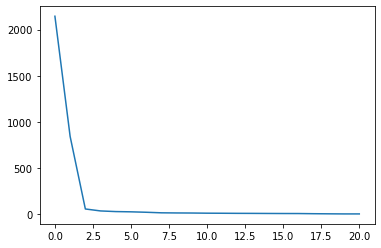

In [34]:
print(S)
plt.plot(S)
# demonstrate features selected by PCA would do poorly in RF but do well with lasso
# normalize every feature and try again

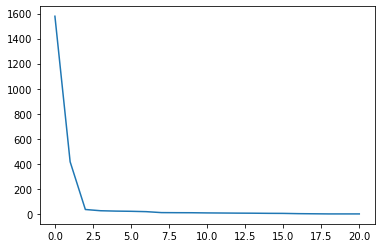

In [35]:
Sn
plt.plot(Sn)

In [37]:
clf = lr(penalty='l2').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te)) # clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

1.0
Coefficients: [[ 7.41732011e+00 -4.55712118e-01 -2.05866869e-02 -8.04929283e-02
  -4.52783132e-02  7.81811901e-04  1.79781890e-01  4.67636010e-01
  -1.25834219e+00 -1.41872753e-02 -6.81332506e-02 -3.23209708e-01
  -8.12034036e-02  8.95043866e-02  8.78586952e-03 -9.95229625e-02
  -2.86378230e-01 -1.63616021e-02 -3.09899358e-01 -5.36219887e-02
  -4.27184829e-01]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
clf = lr(penalty='l1', solver='liblinear').fit(rain_x_tr, rain_y_tr)
print(clf.score(rain_x_te, rain_y_te))# , clf.score(rain_x_te_true, rain_y_te_true), clf.score(rain_x_te_false, rain_y_te_false))
print('Coefficients:', clf.coef_)

1.0
Coefficients: [[ 1.21119318e+01 -1.34939791e+00 -7.69987148e-02  0.00000000e+00
   0.00000000e+00 -5.56615120e-03  0.00000000e+00  0.00000000e+00
  -8.23952476e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [39]:
# run pca for different numbers of output features, see how loss changes
# comparison with lasso (ridge)
# and RF to see loss progression
rain_norm_x_tr.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasTitle,Sex_female,Sex_male,CabinType_A,...,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,CabinType_NaN,CabinType_T,Embarked_C,Embarked_Q,Embarked_S
count,1047.000000,1047.000000,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,...,1047.000000,1047.000000,1047.000000,1047.000000,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,-0.001074,0.006933,-7.981631e-02,-0.004107,-0.023040,-1.115820,0.002497,-0.000696,0.000696,0.001340,...,0.002688,0.000198,-0.001713,0.002104,7.296485e-07,-0.003863,0.000191,-0.001871,-0.001319,0.003190
std,0.484692,0.835761,1.305158e+01,1.061998,0.799024,48.741037,0.261151,0.478833,0.478833,0.133547,...,0.262706,0.184724,0.169585,0.133547,6.172100e-02,0.420536,0.030905,0.403450,0.290074,0.457172
min,-0.377387,-1.294882,-2.971114e+01,-0.498854,-0.385027,-33.295479,-0.071047,-0.355997,-0.644003,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-3.819710e-03,-0.774637,-0.000764,-0.206264,-0.093965,-0.699771
25%,-0.377387,-0.294882,-7.881138e+00,-0.498854,-0.385027,-25.399679,-0.071047,-0.355997,-0.644003,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-3.819710e-03,0.225363,-0.000764,-0.206264,-0.093965,-0.699771
50%,-0.377387,0.705118,-3.552714e-15,-0.498854,-0.385027,-19.187179,-0.071047,-0.355997,0.355997,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-3.819710e-03,0.225363,-0.000764,-0.206264,-0.093965,0.300229
75%,0.622613,0.705118,5.118862e+00,0.501146,-0.385027,-2.795479,-0.071047,0.644003,0.355997,-0.016807,...,-0.071811,-0.035141,-0.031322,-0.016043,-3.819710e-03,0.225363,-0.000764,-0.206264,-0.093965,0.300229
max,0.622613,0.705118,5.011886e+01,7.501146,8.614973,479.033721,0.928953,0.644003,0.355997,0.983193,...,0.928189,0.964859,0.968678,0.983957,9.961803e-01,0.225363,0.999236,0.793736,0.906035,0.300229


In [42]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 22):
    pca = PCA(n_components=i)
    pcan = PCA(n_components=i)
    pca.fit(rain_x_tr)
    pcan.fit(rain_norm_x_tr)
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

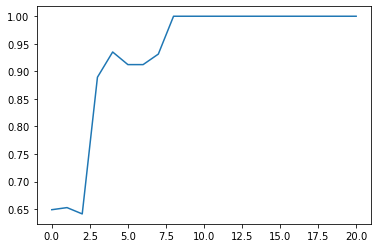

In [43]:
plt.plot(scores)

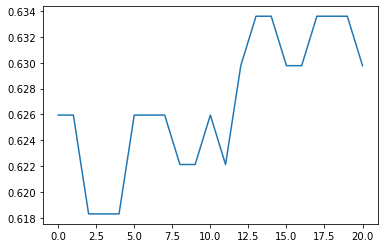

In [44]:
plt.plot(scoresn)

In [45]:
cmatricesn

[array([[162,   0],
        [ 98,   2]], dtype=int64),
 array([[162,   0],
        [ 98,   2]], dtype=int64),
 array([[162,   0],
        [100,   0]], dtype=int64),
 array([[162,   0],
        [100,   0]], dtype=int64),
 array([[159,   3],
        [ 97,   3]], dtype=int64),
 array([[161,   1],
        [ 97,   3]], dtype=int64),
 array([[161,   1],
        [ 97,   3]], dtype=int64),
 array([[161,   1],
        [ 97,   3]], dtype=int64),
 array([[161,   1],
        [ 98,   2]], dtype=int64),
 array([[161,   1],
        [ 98,   2]], dtype=int64),
 array([[161,   1],
        [ 97,   3]], dtype=int64),
 array([[159,   3],
        [ 96,   4]], dtype=int64),
 array([[159,   3],
        [ 94,   6]], dtype=int64),
 array([[158,   4],
        [ 92,   8]], dtype=int64),
 array([[158,   4],
        [ 92,   8]], dtype=int64),
 array([[157,   5],
        [ 92,   8]], dtype=int64),
 array([[157,   5],
        [ 92,   8]], dtype=int64),
 array([[158,   4],
        [ 92,   8]], dtype=int64),
 array([[1

In [46]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 30):
    pca = KernelPCA(n_components=i, kernel='poly')
    pcan = KernelPCA(n_components=i, kernel='poly')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

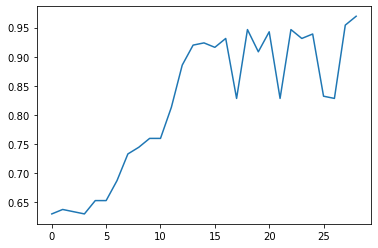

In [47]:
plt.plot(scores)

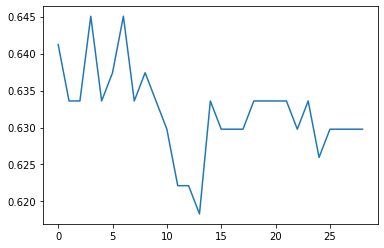

In [48]:
plt.plot(scoresn)

In [49]:
cmatrices = []
cmatricesn = []
scores = []
scoresn = []
for i in range(1, 22):
    pca = KernelPCA(n_components=i, kernel='rbf')
    pcan = KernelPCA(n_components=i, kernel='rbf')
    pca.fit(rain_x_tr[:5000])
    pcan.fit(rain_norm_x_tr[:5000])
    
    clf = lr(penalty='l2').fit(pca.transform(rain_x_tr), rain_y_tr)
    clfn = lr(penalty='l2').fit(pcan.transform(rain_norm_x_tr), rain_y_tr)
    
    cmatrices.append(cm(rain_y_te, clf.predict(pca.transform(rain_x_te))))
    cmatricesn.append(cm(rain_norm_y_te, clfn.predict(pcan.transform(rain_norm_x_te))))
    
    scores.append(clf.score(pca.transform(rain_x_te), rain_y_te))
    scoresn.append(clfn.score(pcan.transform(rain_norm_x_te), rain_norm_y_te))

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\envs\env_3_6\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

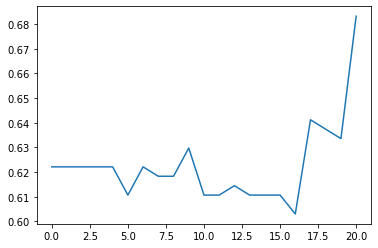

In [50]:
plt.plot(scores)

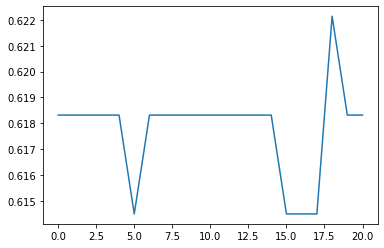

In [51]:
plt.plot(scoresn)